In [1]:
import numpy as np
from matplotlib import pyplot as plt
from evaluation import DetectionResults
plt.rcParams['figure.figsize'] = (6, 6)

In [2]:
dr = DetectionResults('../reval_50/baseline_50/evaluator_dump_R50_101/', area_rng=None, iou_thresh=None)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=13.20s).
nCats: 80 1600000 1600000


In [3]:
nGT = dr.num_gt_all
dets = dr.detections_by_score

In [4]:
nGT = dr.num_gt_class('person')
dets = dr.detections_by_class('person')

In [5]:
sum(dr.num_gt_class(c) for c in dr.names.meta.thing_classes), nGT

(36335, 10777)

In [6]:
TP = np.cumsum([det["true_positive"] for det in dets])
FP = np.cumsum([not det["true_positive"] for det in dets])
TPR = TP / nGT
PPV = TP / (TP + FP)

In [7]:
def interpolated_PPV(ppv):
    """Set precision to max(current, max(following)), so called p_interp."""
    ppvl = ppv.tolist()
    for k in range(len(ppvl)-1, 0, -1):
        ppvl[k-1] = max(ppvl[k-1], ppvl[k])
    return np.array(ppvl)

PPVi = interpolated_PPV(PPV)

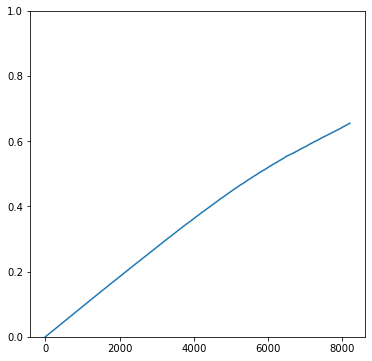

In [8]:
plt.plot(TPR);
ax = plt.gca()
ax.set_ylim([0, 1]);

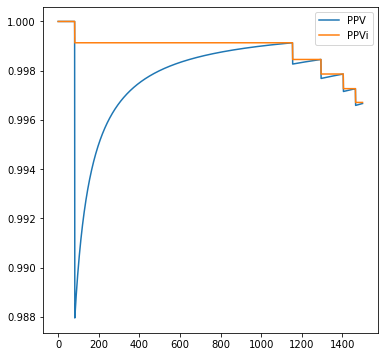

In [9]:
plt.plot(PPV[:1500], label="PPV");
plt.plot(PPVi[:1500], label='PPVi');
plt.legend();

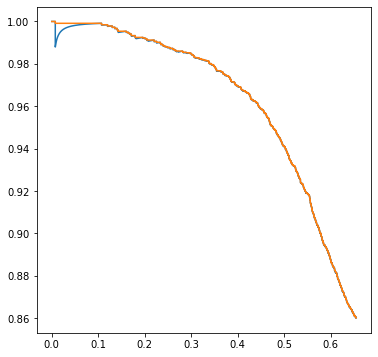

In [10]:
# plt.scatter(x=TPR, y=PPV);
plt.plot(TPR, PPV)
plt.plot(TPR, PPVi);

(0.0, 1.0)

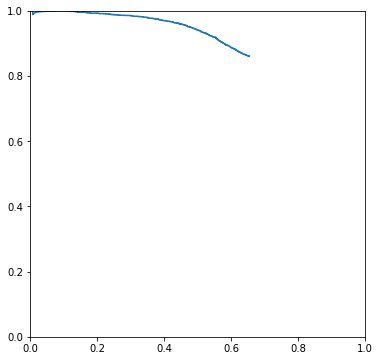

In [11]:
# plt.scatter(x=TPR, y=PPV);
plt.plot(TPR, PPV)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

In [12]:
np.searchsorted([1, 2, 3], [-1, 0, 1, 2, 4], side="left")

array([0, 0, 0, 1, 3])

In [13]:
# see COCOeval.accumulate()

recThrs = np.linspace(0.0, 1.00, int(np.round((1.00 - 0.0) / 0.01)) + 1, endpoint=True)
inds = np.searchsorted(TPR, recThrs, side="left")
q = np.zeros_like(recThrs)
for ri, pi in enumerate(inds):
    if pi >= len(PPVi):
        break
    q[ri] = PPVi[pi]

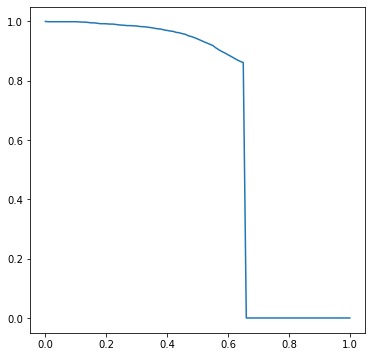

In [14]:
plt.plot(recThrs, q)

In [15]:
dr.coco.accumulate() 

Accumulating evaluation results...
DONE (t=2.18s).


In [16]:
dr.coco.eval['precision'][0, :, 0, 0, 0]

array([1.        , 0.99897541, 0.99897541, 0.99897541, 0.99897541,
       0.99897541, 0.99897541, 0.99897541, 0.99897541, 0.99897541,
       0.99751037, 0.99751037, 0.99548872, 0.9941452 , 0.9941452 ,
       0.9941452 , 0.99367089, 0.9919181 , 0.99131767, 0.99085219,
       0.98765432, 0.98093588, 0.97132323, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
dr.coco.eval['precision'].shape

(10, 101, 80, 4, 3)

In [18]:
dr.coco.eval['precision'][0, :, 1, 0, 0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.95652174, 0.95652174,
       0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.95652174,
       0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.95652174,
       0.95652174, 0.95652174, 0.94805195, 0.94805195, 0.94047619,
       0.94047619, 0.92222222, 0.91489362, 0.90721649, 0.88571429,
       0.88073394, 0.85217391, 0.84166667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
np.mean(dr.coco.eval['precision'][0, :, 1, :, :])

0.45639812191854084

In [20]:
np.mean(dr.coco.eval['precision'][:, :, :, :, :])

0.2849131008682629

In [21]:
dr.coco.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.316
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.443
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.352
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.348
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.443
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.361
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.394
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.519


In [22]:
dr.names.name_to_id('person')

1

In [23]:
# I guess -1 precision is for FP = FP = 0
s = dr.coco.eval['precision']
s.min()

0.0